# MNIST example with convolutional neural network (CNN) classifier

In [1]:
# Import packages

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'tensorflow'

#### Load and preprocess the data

In [2]:
# Load MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Rescaling the training and test images so their values lie in the range in the interval [0,1].

In [2]:
# Scale function

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1, respectively.
    It returns a tuple (train_images, test_images) of scaled training and test images.
    """
    
    train_images = train_images / 255.
    test_images = test_images / 255.
    return train_images, test_images

In [3]:
# Rescale the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

NameError: name 'train_images' is not defined

In [7]:
# Add a dummy channel dimension to the data

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network (CNN) model

This CNN model has the following specifications:

* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. 
* A 2D max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In [8]:
# Model creator function

def get_model(input_shape):
    """
    This function builds a Sequential model according to the above specification.
    Returns: the generated model.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8,(3,3), padding="same", activation="relu", input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    return model
    

In [11]:
# Create the model

model = get_model(scaled_train_images[0].shape)

#### Compiling the model

In [16]:
# Compile model function

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimizer,
    loss function and metric.
    Compile the model using the Adam optimizer (with default settings), the sparse categorical crossentropy loss
    function and accuracy as the metric. 
    """
    model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    

In [17]:
# Compile the model

compile_model(model)

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [20]:
# Train model function

def train_model(model, scaled_train_images, train_labels):
    """
    This function trains the model using the scaled_train_images and train_labels. 
    Returns: object "history", containing the training history
    """
    history = model.fit(scaled_train_images, train_labels, epochs=5, batch_size = 256)
    return history
    

In [21]:
# Train the model

history = train_model(model, scaled_train_images, train_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 58s 964us/sample - loss: 0.2264 - accuracy: 0.9343
Epoch 2/5
60000/60000 [==============================] - 52s 868us/sample - loss: 0.1442 - accuracy: 0.9585
Epoch 3/5
60000/60000 [==============================] - 53s 877us/sample - loss: 0.1024 - accuracy: 0.9698
Epoch 4/5
60000/60000 [==============================] - 52s 870us/sample - loss: 0.0785 - accuracy: 0.9763
Epoch 5/5
60000/60000 [==============================] - 52s 867us/sample - loss: 0.0621 - accuracy: 0.9821


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [22]:
# Load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

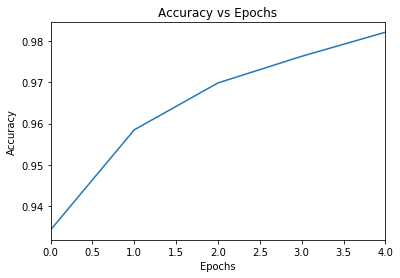

In [23]:
# Make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

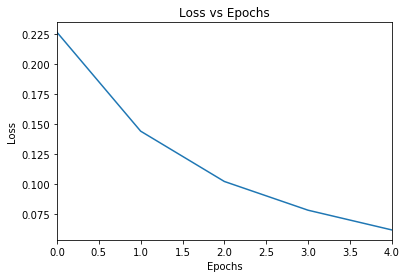

In [24]:
# Make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [27]:
# Evaluate model function

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose = 2)
    return test_loss, test_accuracy

In [28]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 5s - loss: 0.0330 - accuracy: 0.9797
Test loss: 0.0637401223926805
Test accuracy: 0.9797000288963318


#### Model predictions

Let's randomly randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

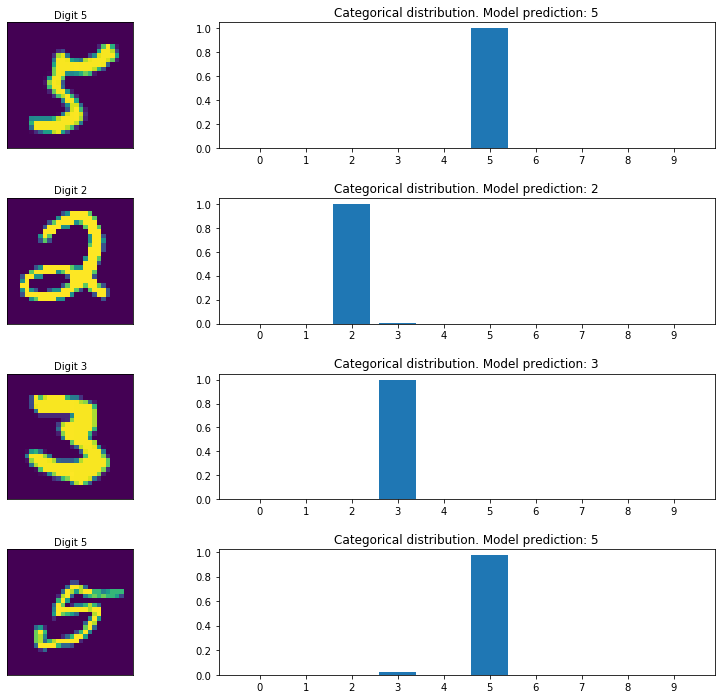

In [29]:
# Get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()